<div class='alert alert-info alert-block' align='center'><h1>Time Series Analysis</h1></div>

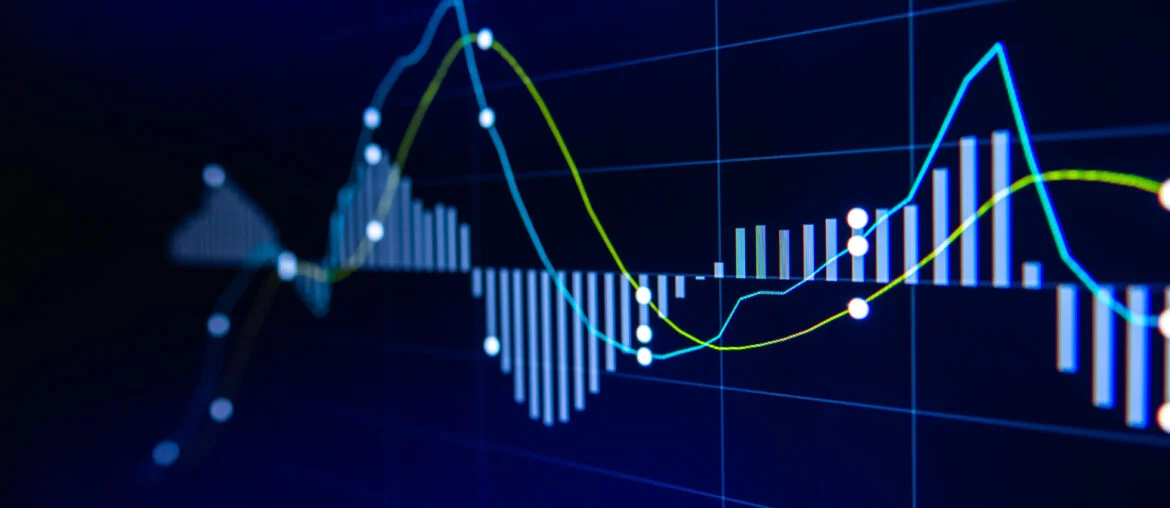

In [5]:
Image(r"C:\Users\shubh\Desktop\python\upgrad\Images\TimeSA.jpg")

## Data Description

This dataset contains time-series data for Netflix, with stock values spanning five years from 2018 to 2022. It includes information on stock prices and trading volume. The key columns in the dataset are:

**Date:** Date at which a particular value of stock was recorded.

**Open::** The value at which stock was opened at that day.

**High::** Highest value of the stock during the day.

**Low::** Lowest value of the stock during the day.

**Close::** The day end's value of the stock, the closing value

**Adj Close::** The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions

**Volume::** Volume in the stock market means the total number of shares traded in a specified time frame. This would include every share that is bought and sold during the time period in review


In [148]:
# importing libraries
import pandas as pd
import numpy as np

import os

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# importing time series libraries
import yfinance as yf
import mplfinance as mpf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose ,STL
from statsmodels.tsa.api import acf , pacf,adfuller
from statsmodels.tsa.api import ExponentialSmoothing ,SimpleExpSmoothing
from statsmodels.tsa.ar_model import AutoReg

# importing scikit learn library for evaluation
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
from pylab import rcParams

In [150]:
# getting all files in current working directory
path = os.getcwd()
os.listdir(path)

['.ipynb_checkpoints',
 'Netflix_TSA-Copy1.ipynb',
 'Netflix_TSA.ipynb',
 'NFLX.xls',
 'TimeSeries.ipynb',
 'Time_series_cs-Copy1.ipynb']

In [152]:
# loading data of Netflix 
data = pd.read_csv(r'NFLX.xls')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [153]:
# last 5 rows of the dataset
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [156]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [157]:
# rows and columns of dataset
data.shape

(1009, 7)

<div class='alert alert-info alert-block' align='center'><h2>About Netflix</h2></div>

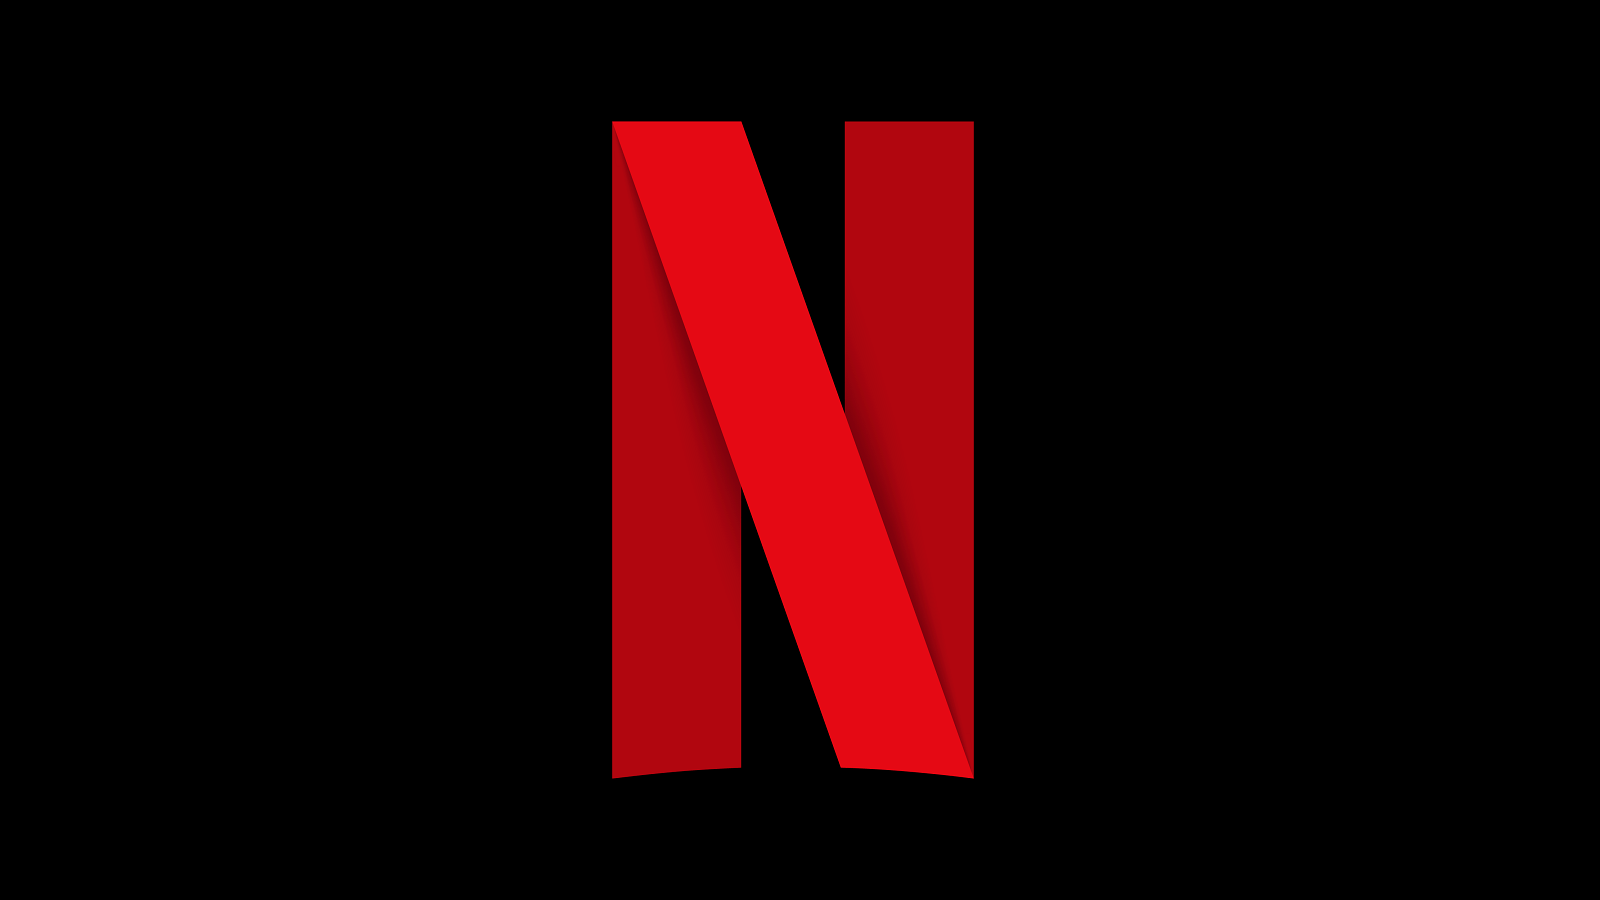

In [159]:
Image(r"C:\Users\shubh\Desktop\python\upgrad\Images\net.jpg",width=1100)

In [160]:
# fetching details about netflix stock using yfinance library
ticker=yf.Ticker('NFLX')

In [161]:
# Fetch data for the last 5 years
# data = ticker.history(period='5y')  
# data.tail()

In [162]:
# Summary about the Neflix stock
print(ticker.info['longBusinessSummary'])

Netflix, Inc. provides entertainment services. It offers TV series, documentaries, feature films, and games across various genres and languages. The company also provides members the ability to receive streaming content through a host of internet-connected devices, including TVs, digital video players, TV set-top boxes, and mobile devices. It has operations in approximately 190 countries. The company was incorporated in 1997 and is headquartered in Los Gatos, California.


In [165]:
# fetching basic information about the netflix
print('Basic Company Information\n')
print('Short Name :',ticker.info['shortName'])
print('Field :',ticker.info['sector'])
print('Industry :',ticker.info['industry'])
print('Country :',ticker.info['country'])
print('Number of employees :',ticker.info['fullTimeEmployees'])
print('Website :',ticker.info['website'])

Basic Company Information

Short Name : Netflix, Inc.
Field : Communication Services
Industry : Entertainment
Country : United States
Number of employees : 13000
Website : https://www.netflix.com


In [166]:
# Institutional holders list of netflix
ticker.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,Vanguard Group Inc,0.0816,36179028,15936500043
1,2023-06-30,Blackrock Inc.,0.0675,29911686,13175798566
2,2023-06-30,"FMR, LLC",0.0531,23551711,10374293178
3,2023-06-30,Capital Research Global Investors,0.0394,17479045,7699344532
4,2023-06-30,State Street Corporation,0.0377,16699906,7356141593
5,2023-06-30,Price (T.Rowe) Associates Inc,0.0279,12378010,5452389624
6,2023-06-30,Capital World Investors,0.0258,11431257,5035354395
7,2023-06-30,Capital International Investors,0.0252,11167223,4919050059
8,2023-06-30,JP Morgan Chase & Company,0.0216,9594129,4226117883
9,2023-06-30,"Geode Capital Management, LLC",0.0189,8390820,3696072301


<div class='alert alert-info alert-block' align='center'><h2>Exploratory Data Analysis</h2></div>

In [169]:
# descriptive statistics of dataset
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,419.0,109.0,234.0,331.0,378.0,509.0,692.0
High,1009.0,425.0,109.0,251.0,336.0,383.0,516.0,701.0
Low,1009.0,412.0,108.0,231.0,326.0,371.0,503.0,686.0
Close,1009.0,419.0,108.0,234.0,332.0,379.0,509.0,692.0
Adj Close,1009.0,419.0,108.0,234.0,332.0,379.0,509.0,692.0
Volume,1009.0,7570685.0,5465535.0,1144000.0,4091900.0,5934500.0,9322400.0,58904300.0


In [172]:
# converting Date column type to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [173]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


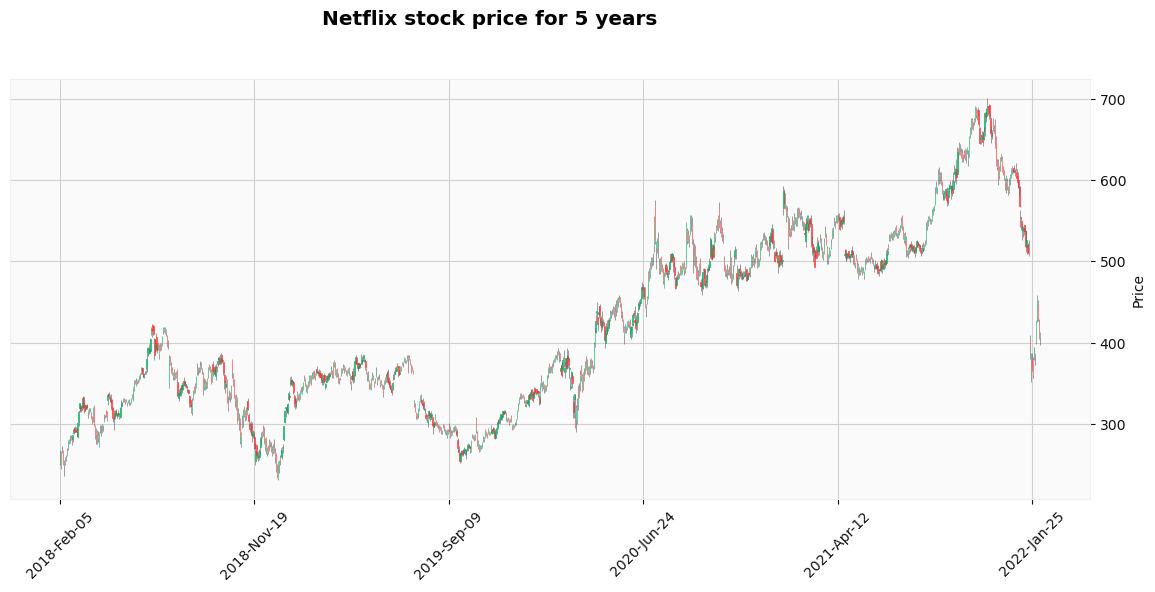

In [175]:
# plotting netlix stock price of 5 years
mpf.plot(data,type='candle',title='Netflix stock price for 5 years',ylabel='Price',style='yahoo',figsize=(15,6))

In [176]:
# plotting netlix stock price of 5 years
# plt.figure(figsize=(15,6))

# plt.plot(data['Close'],label = 'Close')
# plt.title('Netflix stock price for 5 years')

# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.grid()
# plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

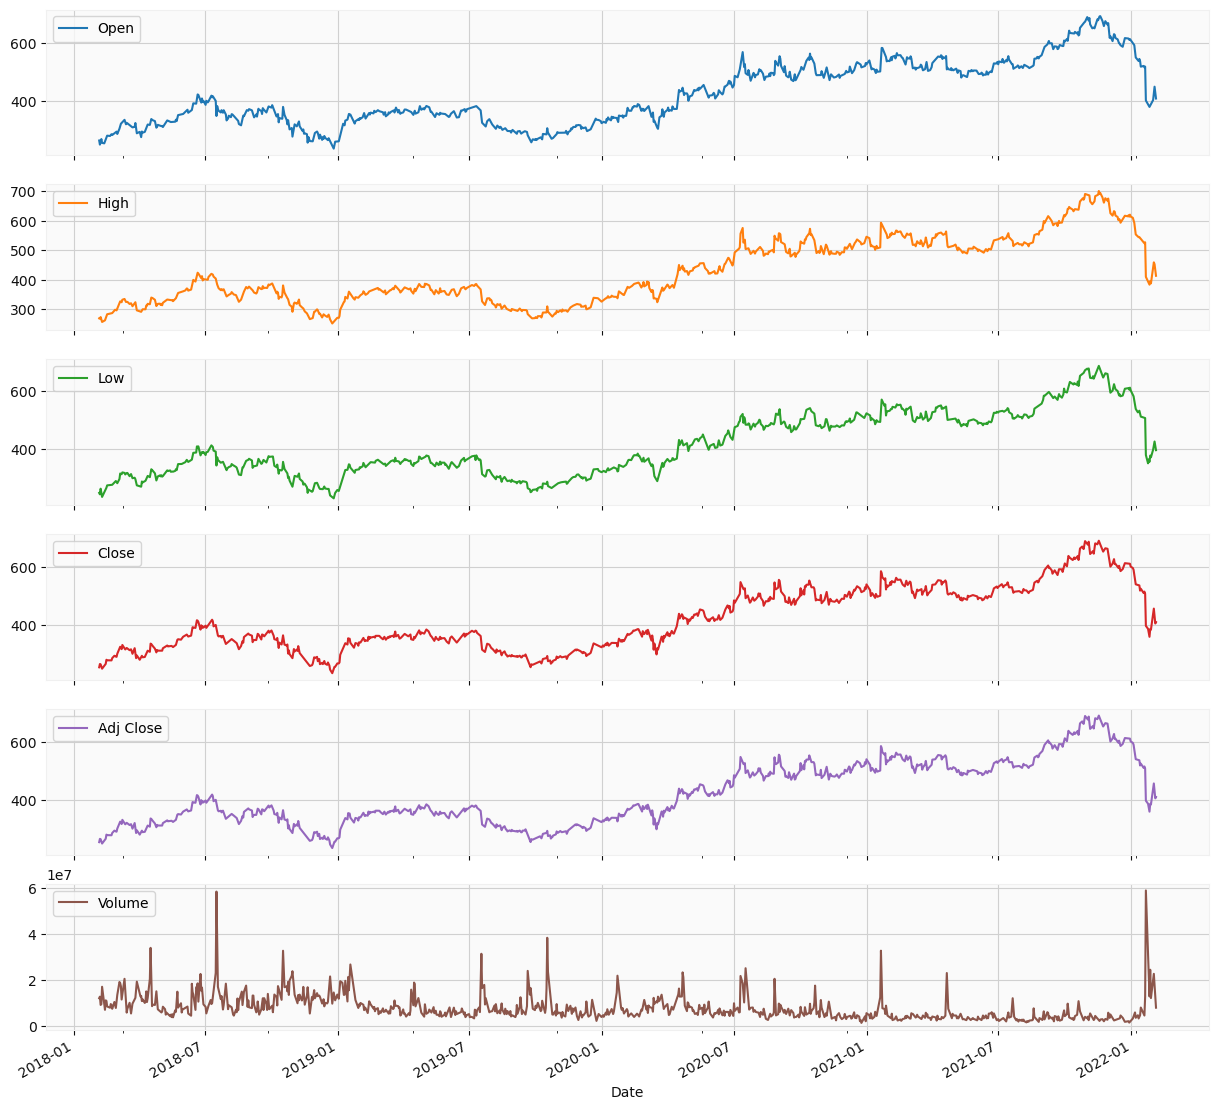

In [178]:
# plotting visual for data
data.plot(subplots=True,figsize=(15,15))

We can draw following conclusions from the plots above. 
1. Overall close and adj close follow the same pattern. This means the stocks; Adj close and close values are same, this is also apparent from the describe dataframe. This also means the company isnt' doing a lot of activities which lead to create a difference between these 2 values.
2. High, low and open look like following the same pattern but in reality they are not the same exactly this can be again confirmed by looking at the describe dataframe above. 
3. Similar pattern between High, low and open also tells us that stock isnt much volatile.
4. Volume shows a pattern of few bumps at the start and end of a few month, which means that most transactions are happening at the start and end of the months.

In [180]:
# lets create new columns for plotting purposes
features, target = data.drop(columns=['Close', 'Volume'], axis = 1), data['Close']

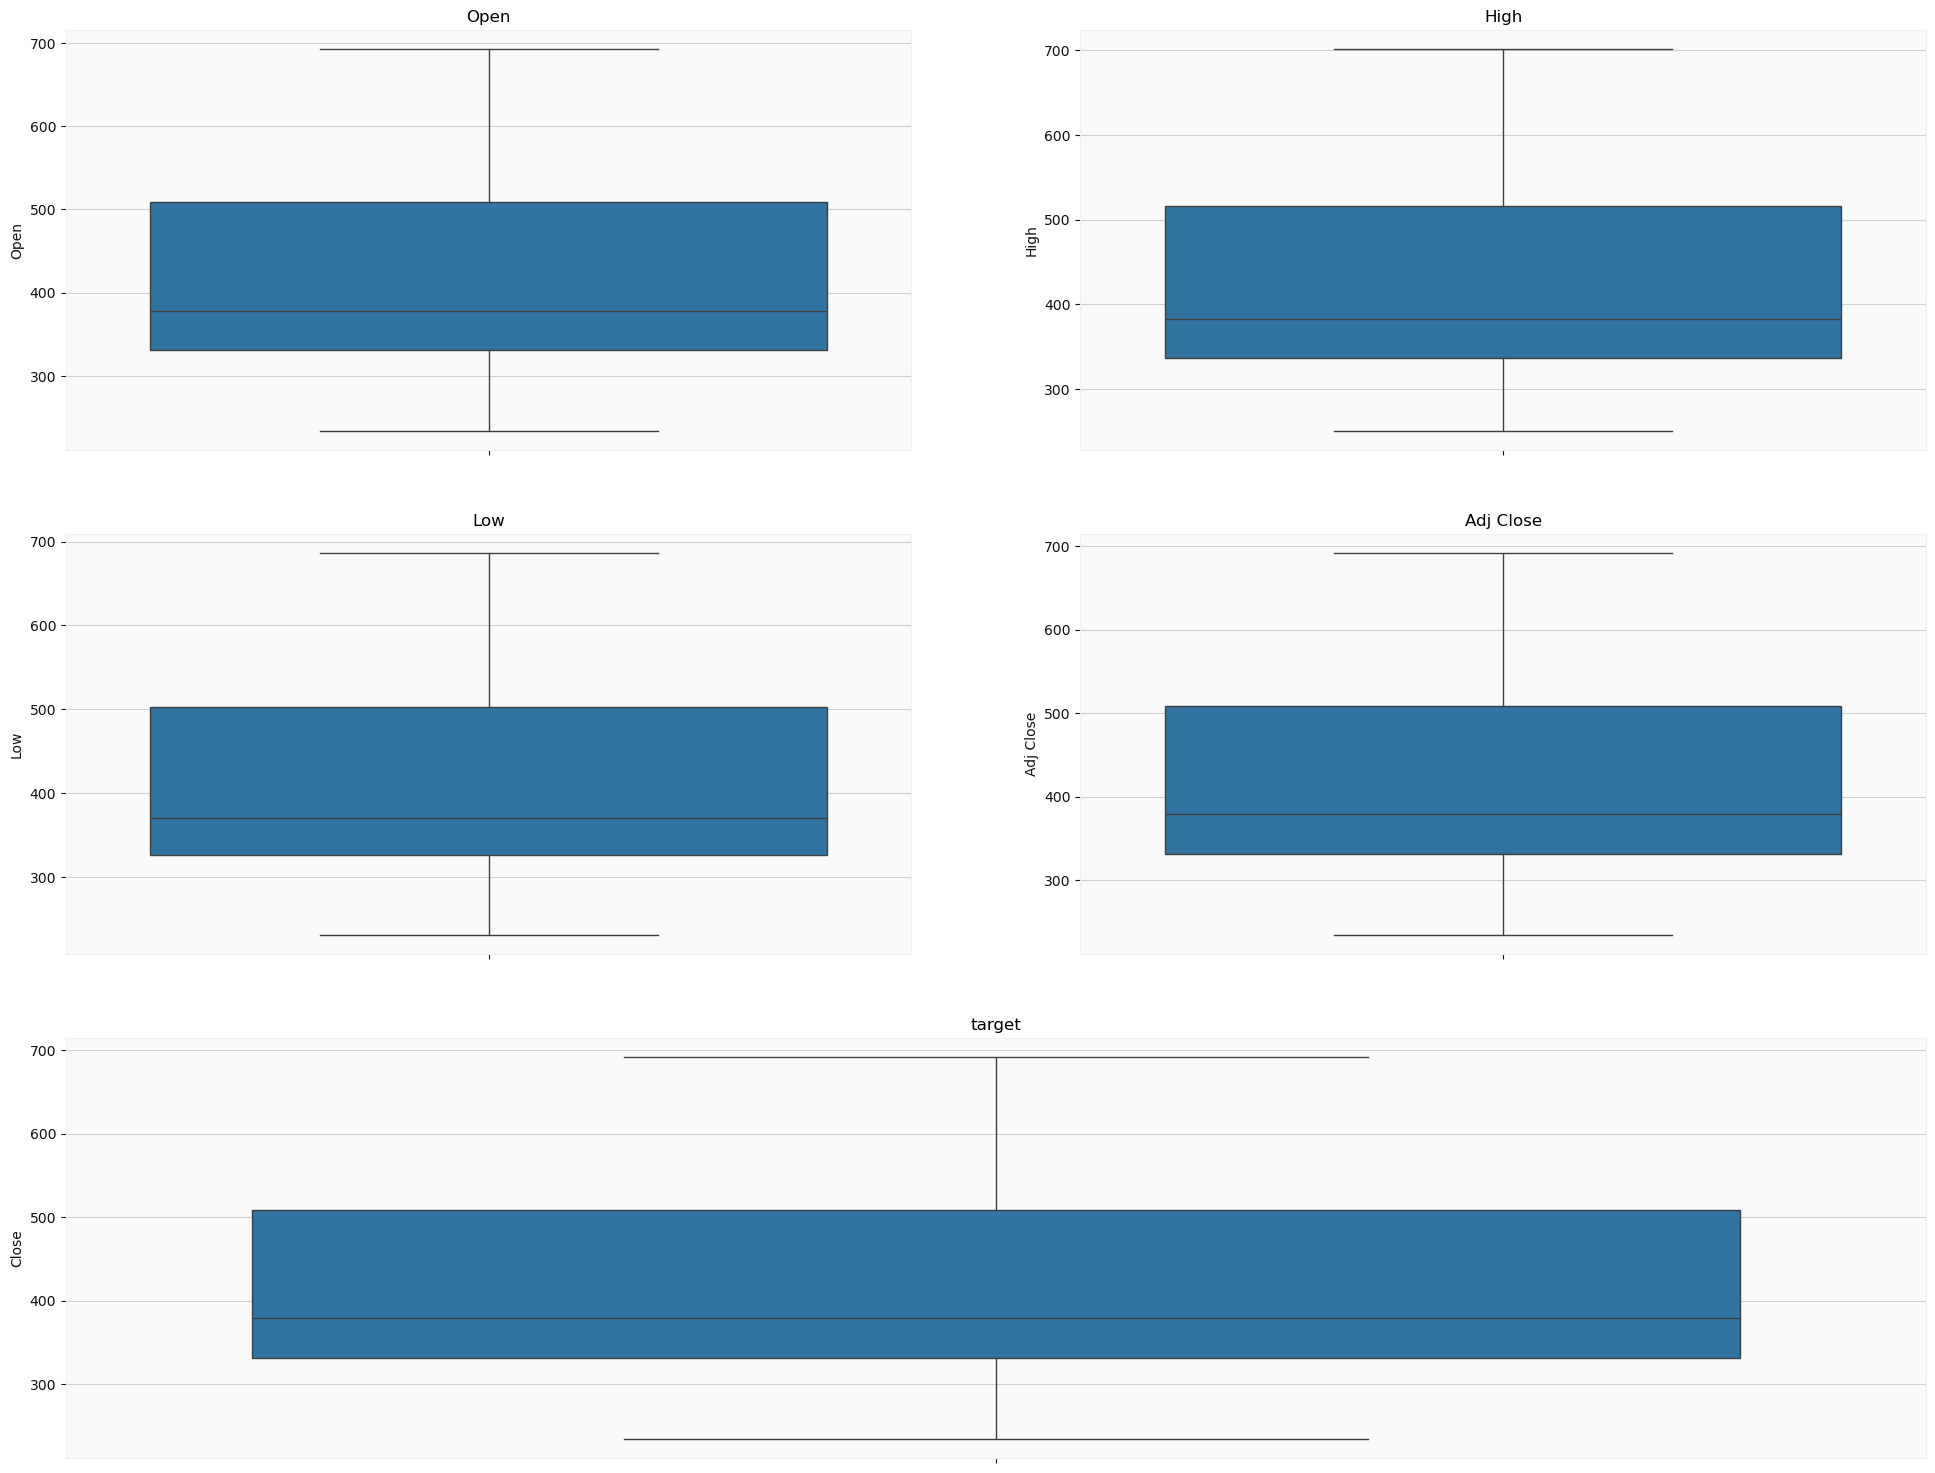

In [182]:
# We will create a plot grid to analyse these columns
# its a 3x2 grid
nrows, ncols = 3, 2
fig = plt.figure(figsize=(24, 12))

# Specify the grid, because we are looking to plot all the plots together
spec = GridSpec(ncols=ncols, nrows=nrows, figure=fig, top=1.3)
my_id = 0
for i in range(nrows):
    for j in range(ncols):
      if i == nrows-1:
        ax = fig.add_subplot(spec[i, :])
        sns.boxplot(target)
        ax.set_title('target')
        break
      ax = fig.add_subplot(spec[i, j])
      sns.boxplot(features.iloc[:, my_id])
      ax.set_title(features.columns[my_id])
      my_id += 1

Most of these plots look similar but they arent the same because the stock moves at a smaller level, hence the differences are not apparent at this scale. But there are indeed differences.
Target is a new column that we developed from the close value, this is exactly what we are trying to predict, what's the value stock will close at.

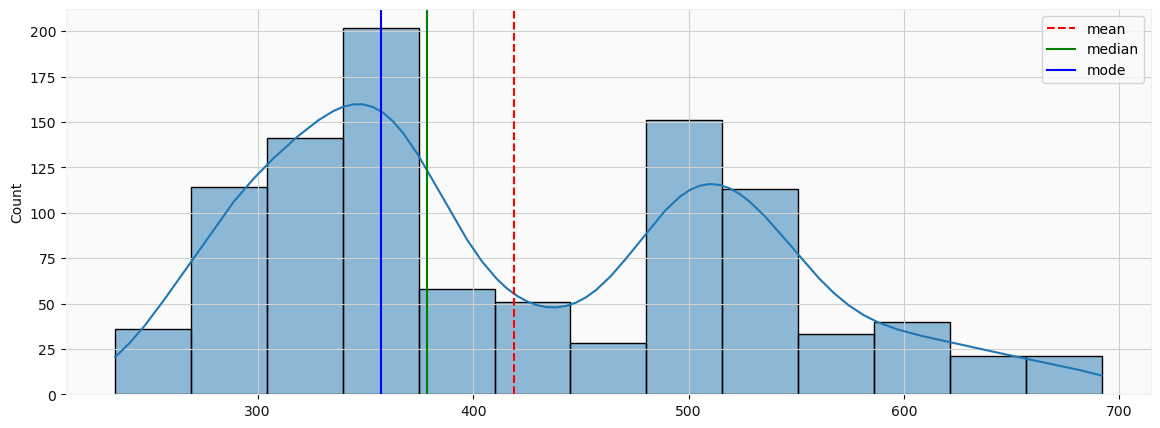

In [184]:
# plotting target column
f ,ax1 = plt.subplots(1,1,figsize=(14,5))

v_dist = target.values
sns.histplot(v_dist,ax=ax1,kde=True)

# mean median mode
mean = target.mean()
median = target.median()
mode = target.mode().values[0]
# plotting mean mode and median line for close column
ax1.axvline(mean , color='red', linestyle='--' ,label='mean')
ax1.axvline(median , color='green', linestyle='-' ,label='median')
ax1.axvline(mode , color='blue', linestyle='-' ,label='mode')
plt.legend()
plt.show()

<div class='alert alert-info alert-block' align='center'><h2>Analysising Time Series</h2></div>

In [186]:
# plotting trend seasonality residual for close column 

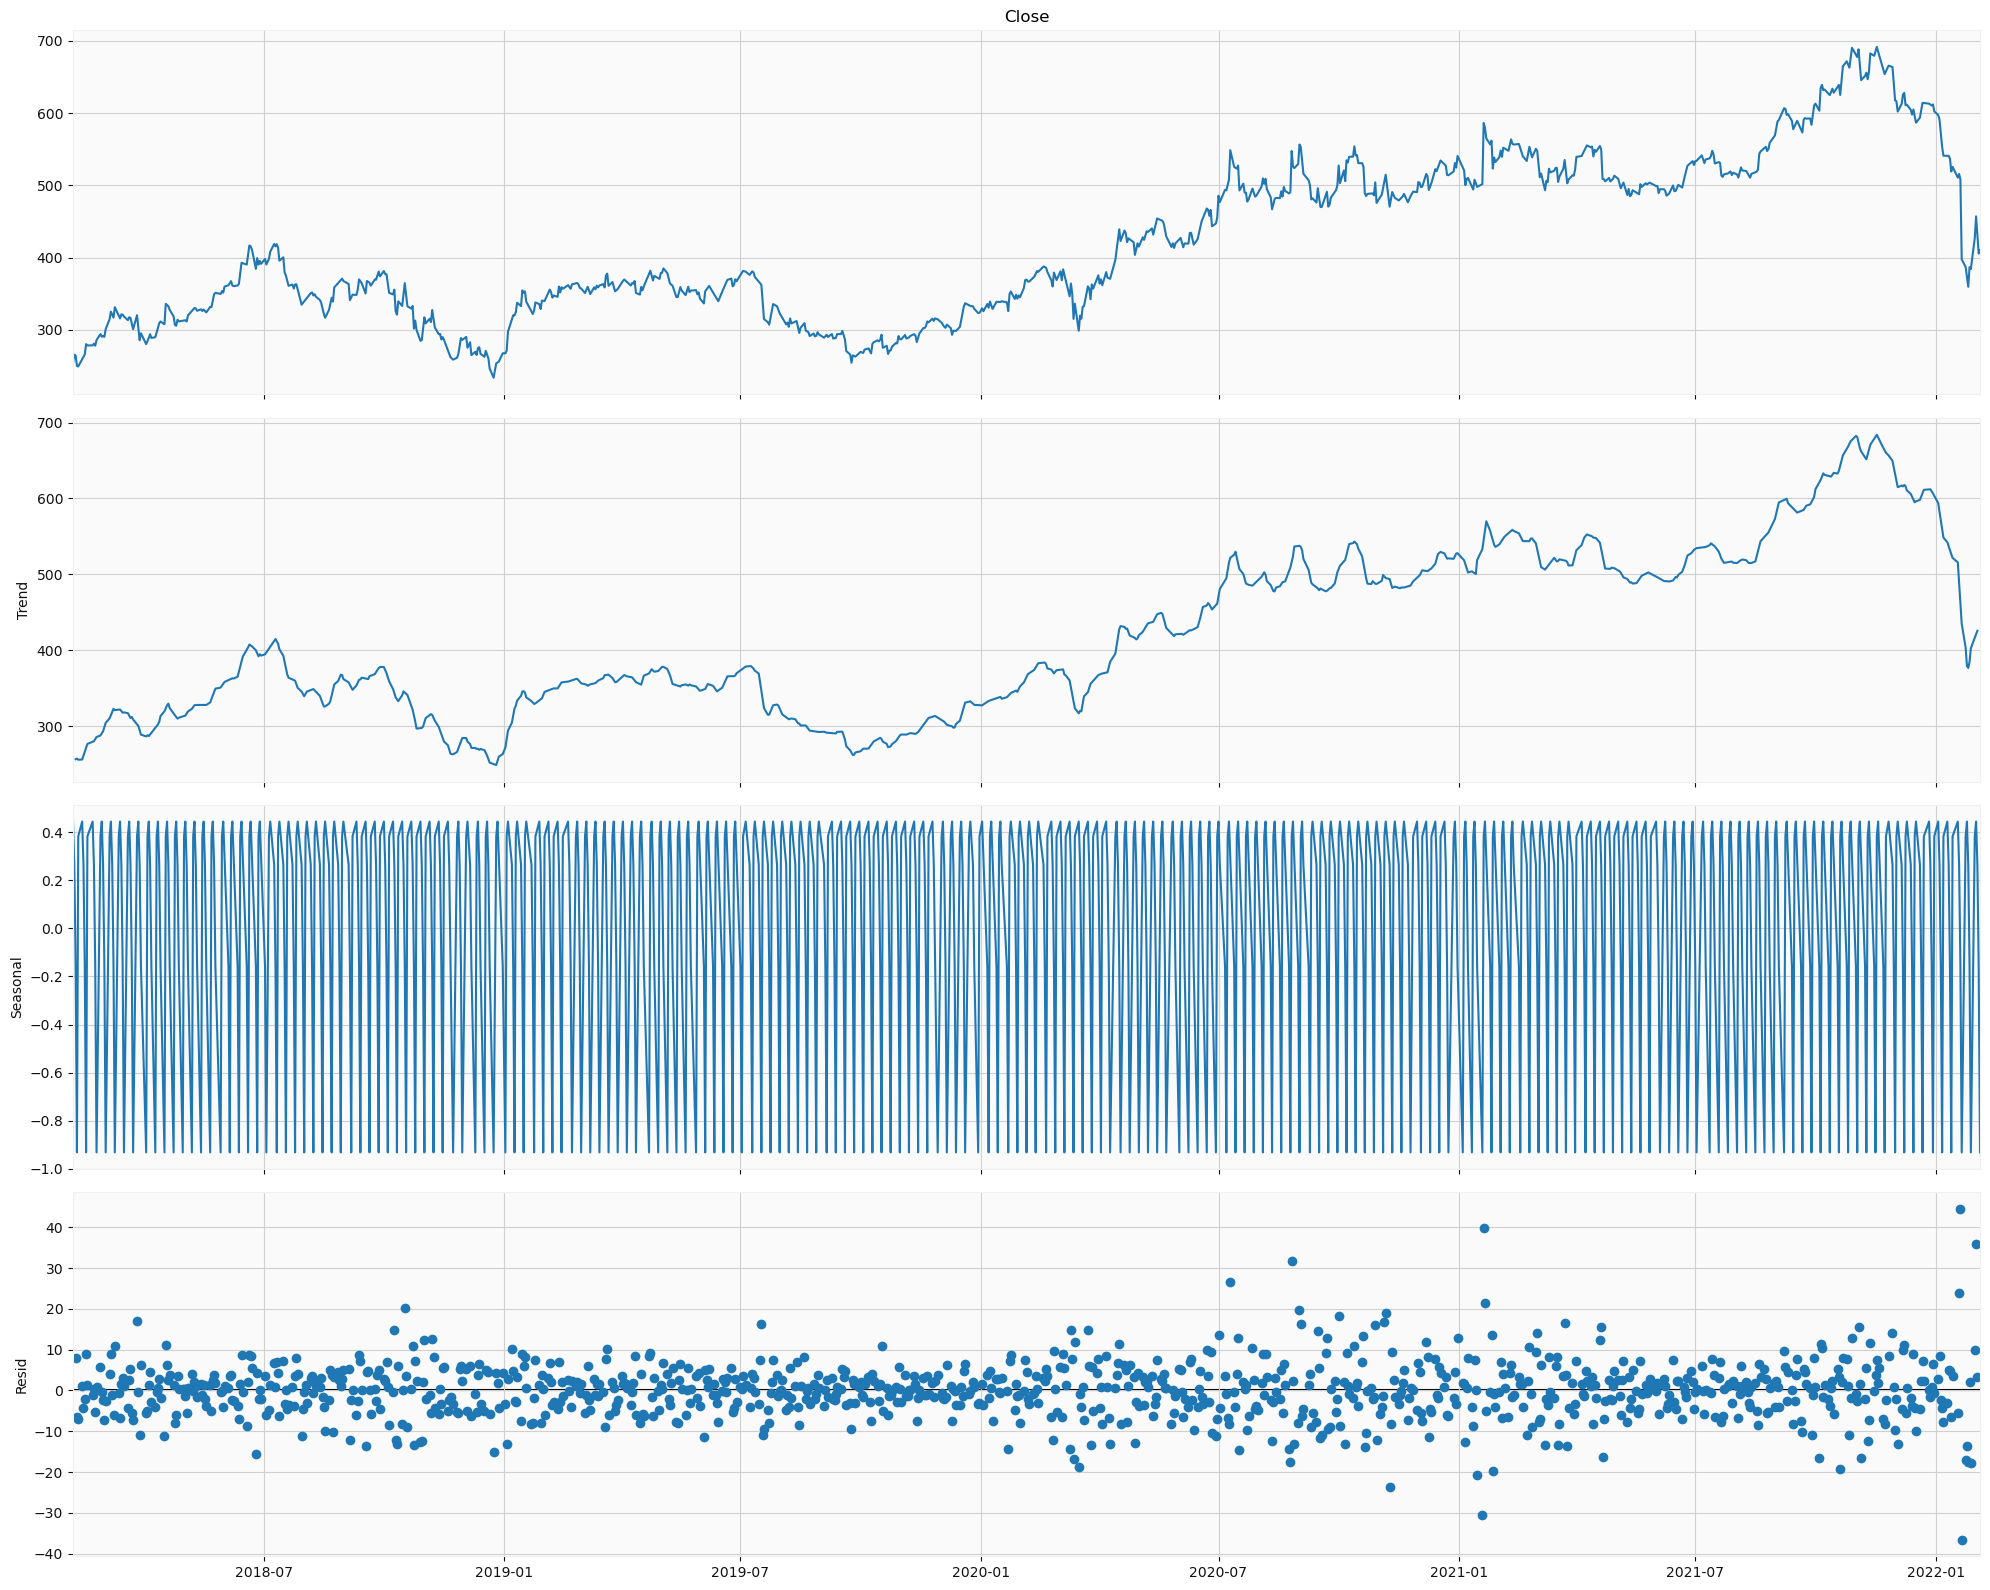

In [187]:
# set figure size
rcParams['figure.figsize'] = 20,16
decompostion_ = seasonal_decompose(data['Close'],model='additive',period=5).plot()
plt.show()

#### Observations on the Stock Close data.
1. We dont see a fixed pattern in the data. 
2. Seasonal plot shows a pattern indeed.
3. Residual plot has a lot of outliers towards the end.

In [189]:
# plt.figure(figsize=(15,12))
# plt.subplot(411)
# plt.plot(data['Close'],label ='Actual')
# plt.legend(loc='best')

# plt.subplot(412)
# plt.plot(decompostion_.trend,label ='trend')
# plt.legend(loc='best')

# plt.subplot(413)
# plt.plot(decompostion_.seasonal,label ='seasonal')
# plt.legend(loc='best')

# plt.subplot(414)
# plt.plot(decompostion_.resid,label ='residual')
# plt.legend(loc='best')

# plt.tight_layout()
# plt.show()

In [191]:
# creating a function to know the stationary of the data

def stationarity_test(timeseries):
    MA = timeseries.rolling(window=5).mean()
    MSTD = timeseries.rolling(window=5).std()

    plt.figure(figsize=(15,6))
    plt.plot(timeseries,label='Original')
    plt.plot(MA,label='Rolling mean')
    plt.plot(MSTD , label = 'Rolling std')
    plt.title('Rolling Mean Vs Rolling STD')
    plt.legend()
    plt.show()

    # Augmented Dicky Test
    print('ADF Test')
    test = adfuller(timeseries,regression='c',autolag='AIC')
    output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)


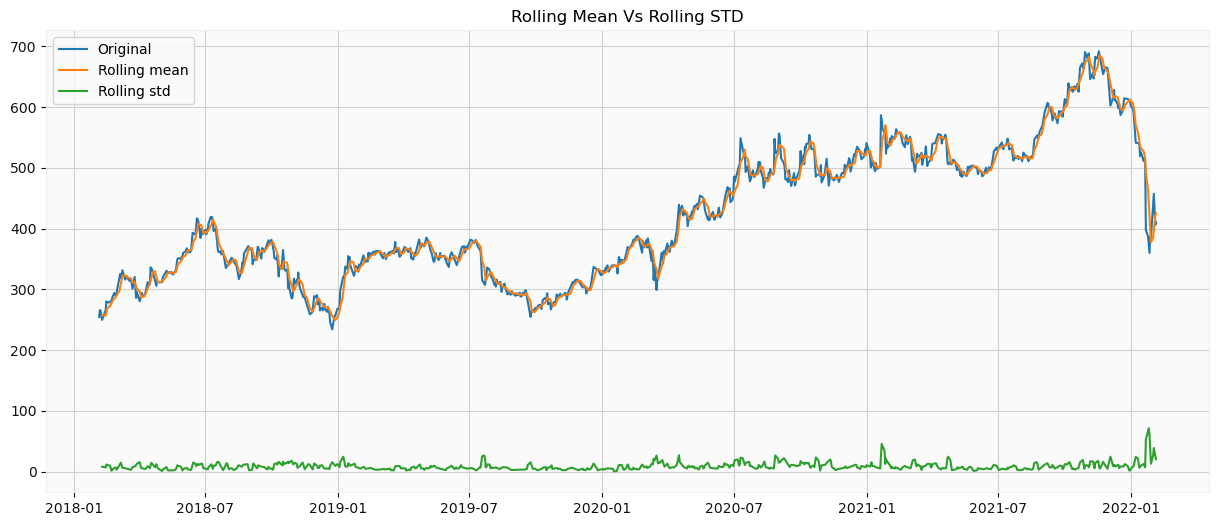

ADF Test
Test Statistic                   -1.812591
p-value                           0.374229
#Lags Used                        6.000000
Number of Observations Used    1002.000000
Critical Value (1%)              -3.436893
Critical Value (5%)              -2.864429
Critical Value (10%)             -2.568308
dtype: float64


In [192]:
stationarity_test(data['Close'])

##### As p_value 0.37 > 0.05 then the data is non stationary

We can easily see using the results above that the time series is not stationary in its current form. 
The plots clearly show the moving average and moving standard deviation are changing so much!

This time series isnt even close to stationary.

Also looking at the results of ADF test also clearly tell that the time series isn't stationary.
Above proofs are irrefutable evidence saying that the time series isn't stationary.

In [194]:
# creating dataframe having Close feature only
df=data[['Close']]
df.head()

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


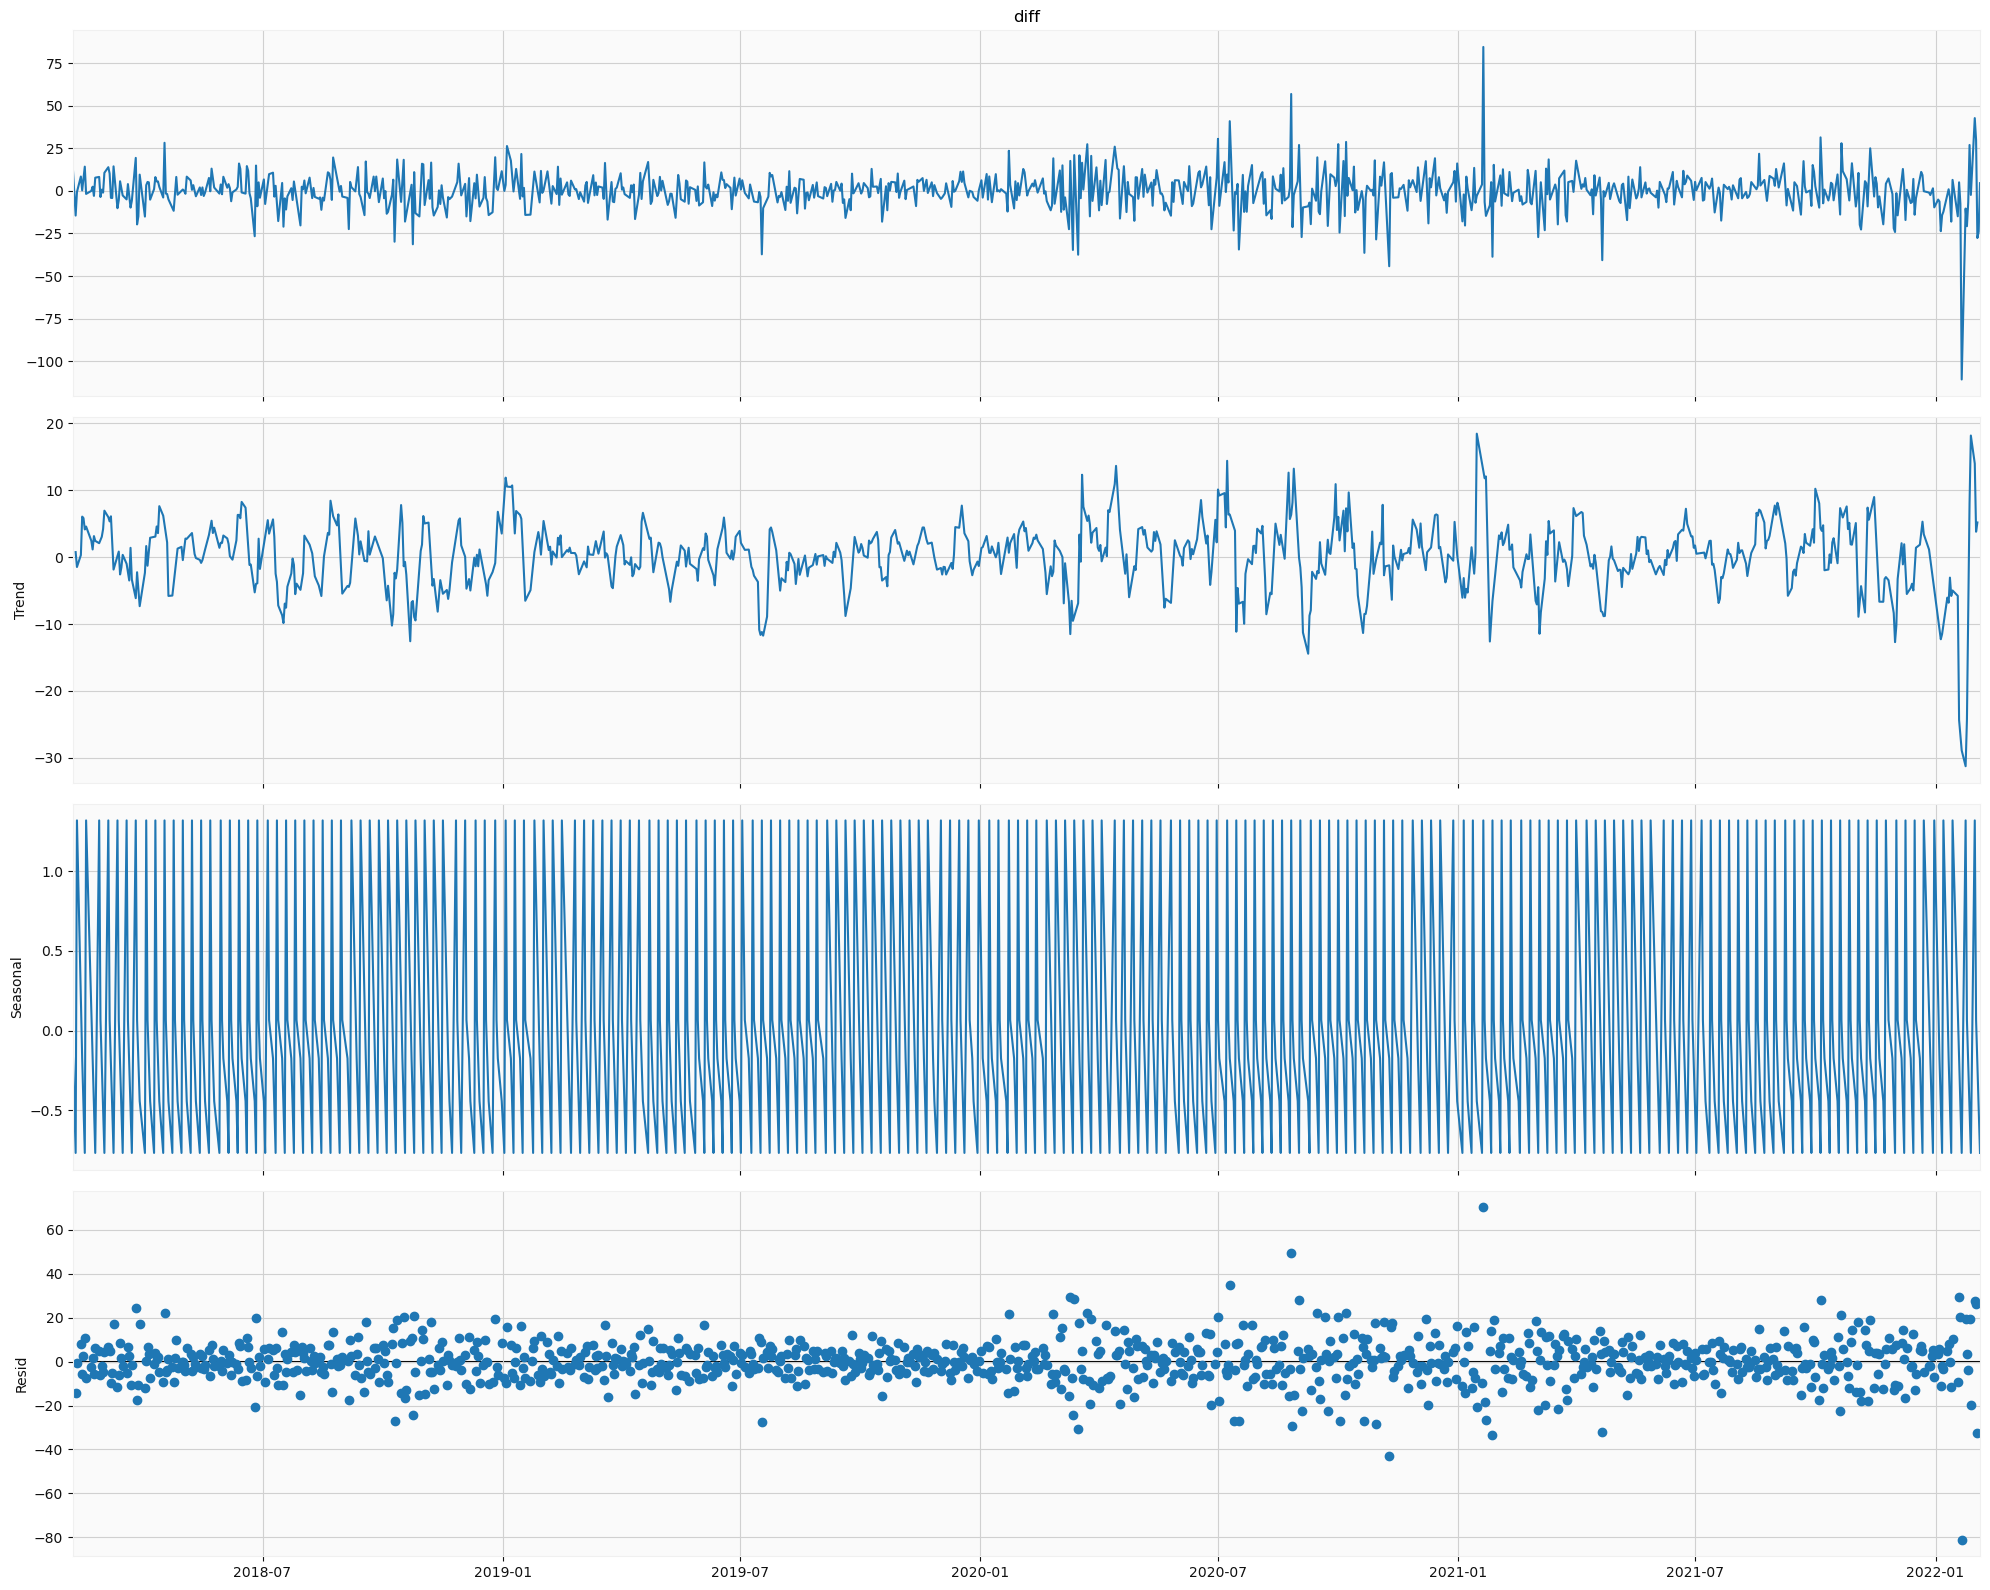

In [195]:
# calculation first difference of Close feature to overcome non stationary
df['diff'] = df['Close'].diff()
df = df.dropna(axis=0)

dec = seasonal_decompose(df['diff'] , model='additive',period=5).plot()
plt.show()

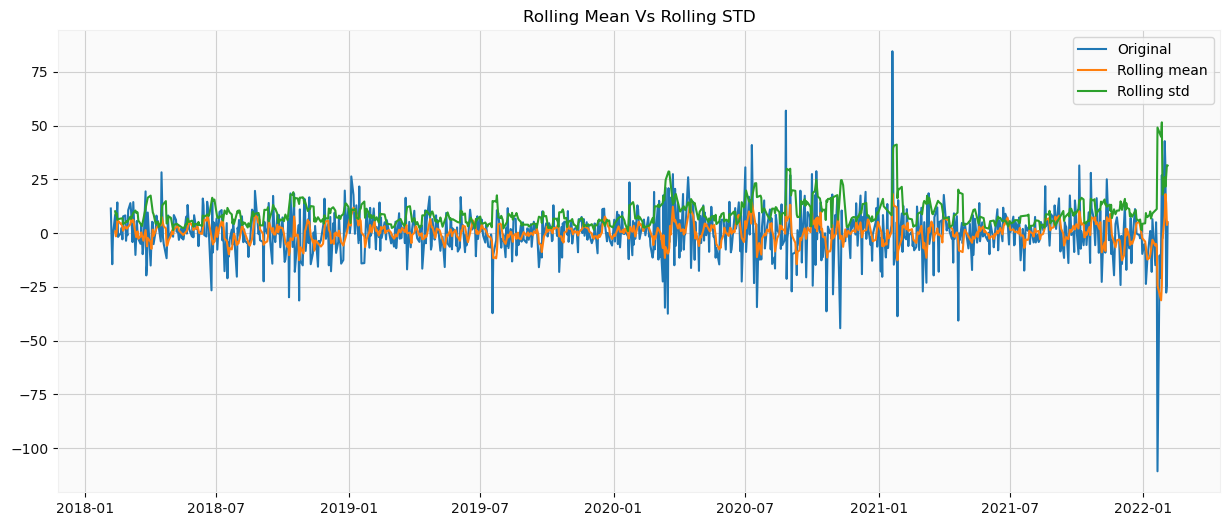

ADF Test
Test Statistic                -1.424228e+01
p-value                        1.530402e-26
#Lags Used                     5.000000e+00
Number of Observations Used    1.002000e+03
Critical Value (1%)           -3.436893e+00
Critical Value (5%)           -2.864429e+00
Critical Value (10%)          -2.568308e+00
dtype: float64


In [196]:
stationarity_test(df['diff'])

##### After taking the first difference, the p-value is 1.530402e-26, which is less than 0.05. Hence, the data can be considered stationary.

Also our plots also show now nearly stable moving average and standard deviation, we have now 2 reasons to believe stationarity of our newly created differenced time series.

<div class='alert alert-info alert-block' align='center'><h2>Modelling Time Series</h2></div>

In [199]:
# function for plotting 

def plotresults(data,forecast,label):
    plt.figure(figsize=(15,4))
    plt.plot(data,label='Train')
    plt.plot(forecast , label=label)
    plt.legend()
    plt.title(label+' Forecasting')
    
    return plt

In [200]:
def scoring(data,forecast,method):
    rmse = root_mean_squared_error(data , forecast).round(2)
    
    results = pd.DataFrame({'Method':[method], 'RMSE': [rmse]})
    results = results[['Method', 'RMSE']]
    return results

In [203]:
# to store models and results(Root mean square error)
models=[]
results=[]

<div class='alert alert-info alert-block' align='center'><h4>Naive Model</h4></div>

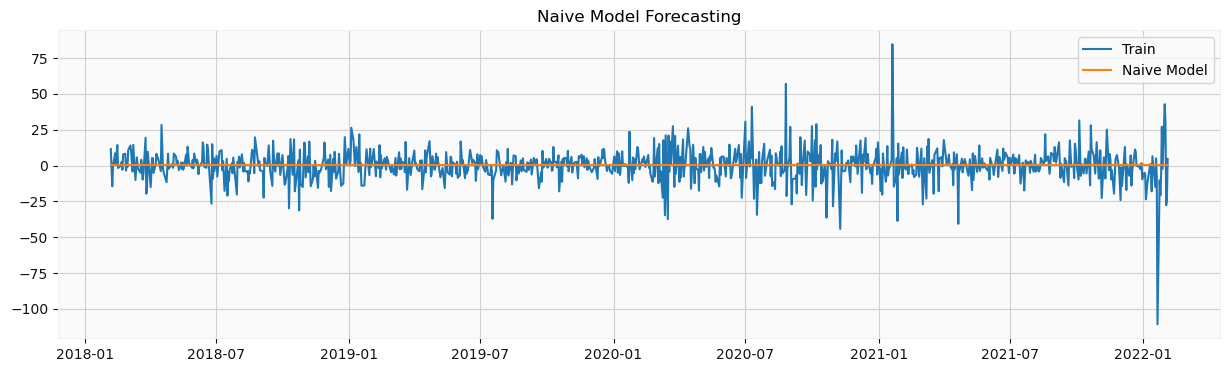

In [205]:
df['naive_forecast'] = df['diff'].mean()

label='Naive Model'

plotresults(df['diff'] , df['naive_forecast'],label).show()

In [206]:
models.append('Naive model')

final = scoring(df['diff'],df['naive_forecast'] , 'Naive Model')
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Naive Model,11.05


<div class='alert alert-info alert-block' align='center'><h4>Moving Average</h4></div>

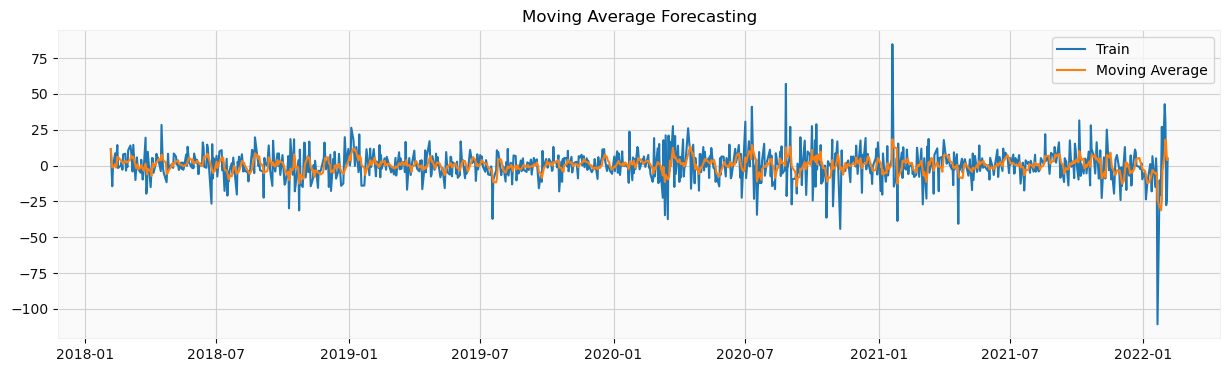

In [210]:
df['MAForecast'] = df['diff'].rolling(window=5,min_periods=1).mean()
label = 'Moving Average'

plotresults(df['diff'] , df['MAForecast'],label).show()

In [211]:
models=['Moving Average']
final = scoring(df['diff'],df['MAForecast'],'Moving Average')
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Moving Average,9.81


<div class='alert alert-info alert-block' align='center'><h4>Exponential Smoothing</h4></div>

In [213]:
fit1 = SimpleExpSmoothing(df['diff']).fit(smoothing_level=0.2,optimized=False)
forcast1 = fit1.forecast(3).rename('alpha-0.2')

fit2 = SimpleExpSmoothing(df['diff']).fit(smoothing_level=0.4,optimized=False)
forcast2 = fit2.forecast(3).rename('alpha-0.4')

fit3 = SimpleExpSmoothing(df['diff']).fit(smoothing_level=0.6,optimized=False)
forcast3 = fit3.forecast(3).rename('alpha-0.6')

fit4 = SimpleExpSmoothing(df['diff'] , initialization_method='estimated').fit()
forcast4 = fit4.forecast(3).rename('no values')

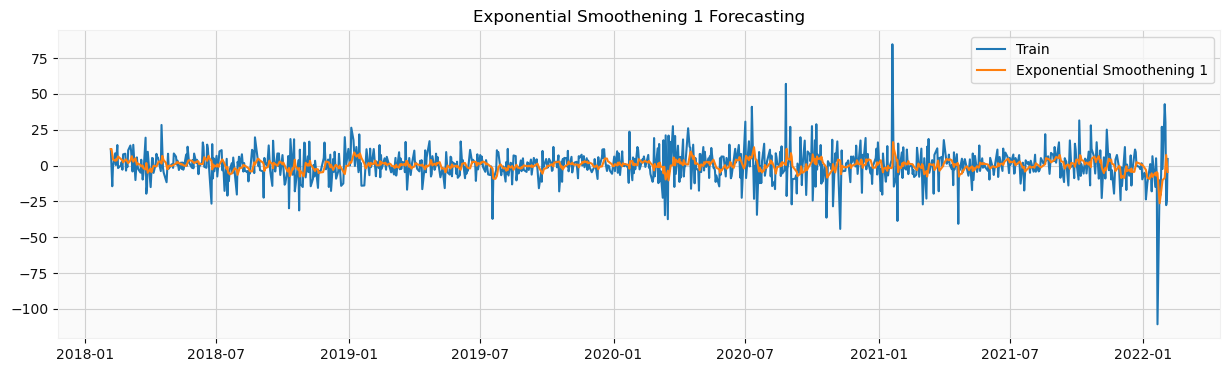

,Method,RMSE
0,Exponential Smoothening 1,11.73


In [214]:

plotresults(df['diff'],fit1.fittedvalues, "Exponential Smoothening 1").show()
scoring(df['diff'],fit1.fittedvalues,"Exponential Smoothening 1")

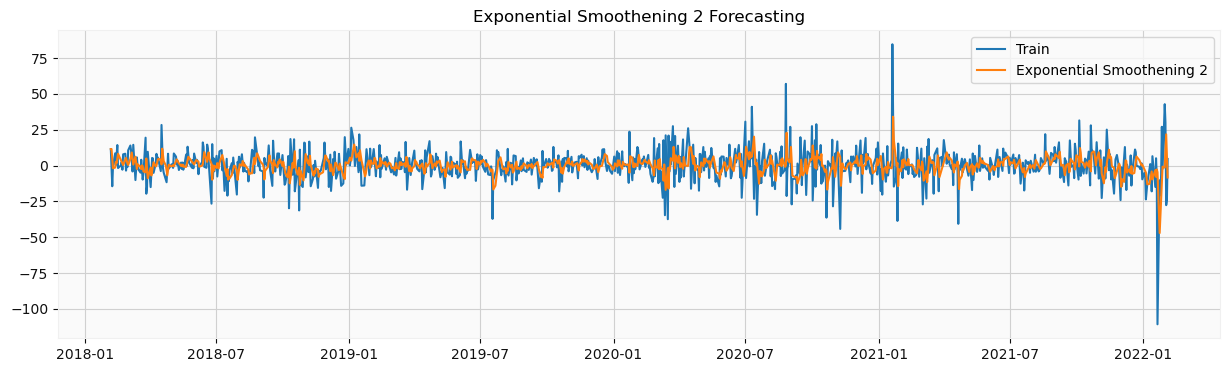

,Method,RMSE
0,Exponential Smoothening 2,12.47


In [215]:

plotresults(df['diff'],fit2.fittedvalues, "Exponential Smoothening 2").show()
scoring(df['diff'],fit2.fittedvalues,"Exponential Smoothening 2")

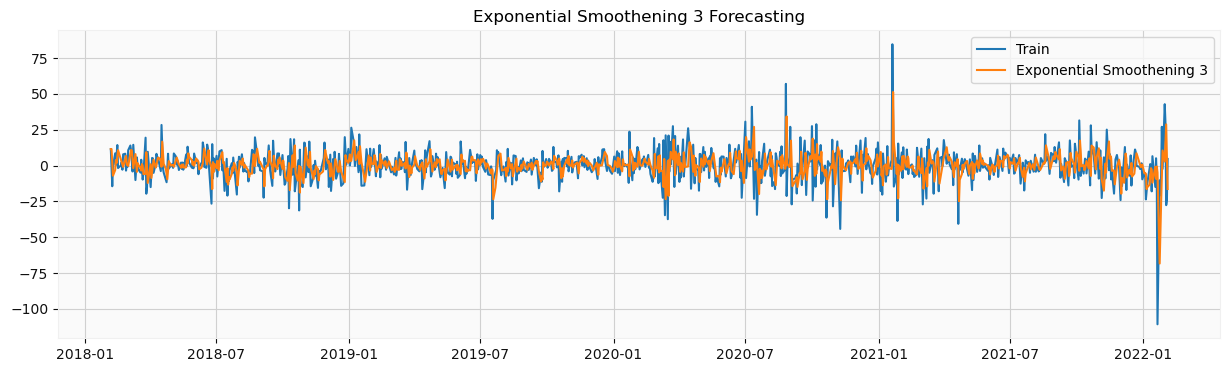

,Method,RMSE
0,Exponential Smoothening 3,13.38


In [216]:

plotresults(df['diff'],fit3.fittedvalues, "Exponential Smoothening 3").show()
scoring(df['diff'],fit3.fittedvalues,"Exponential Smoothening 3")

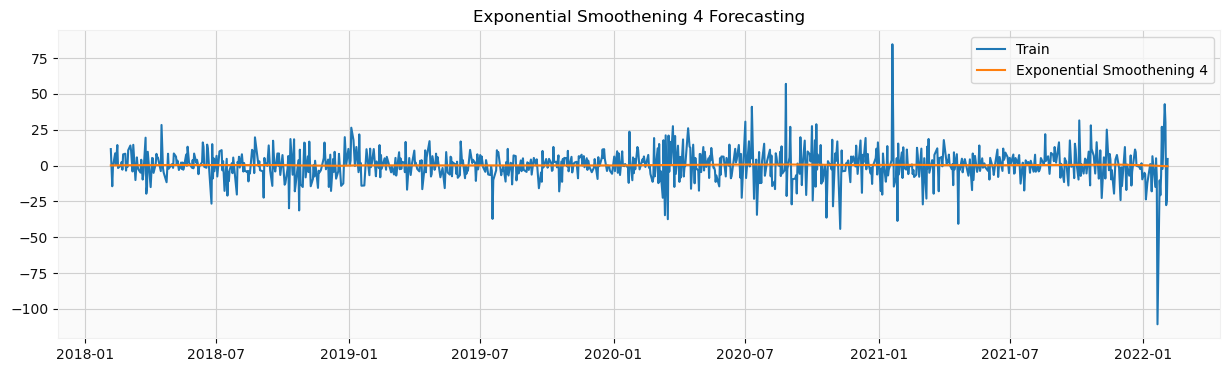

,Method,RMSE
0,Exponential Smoothening 4,11.07


In [217]:

plotresults(df['diff'],fit4.fittedvalues, "Exponential Smoothening 4").show()
scoring(df['diff'],fit4.fittedvalues,"Exponential Smoothening 4")

In [218]:
double_exp = ExponentialSmoothing(df['diff'],trend='add').fit()

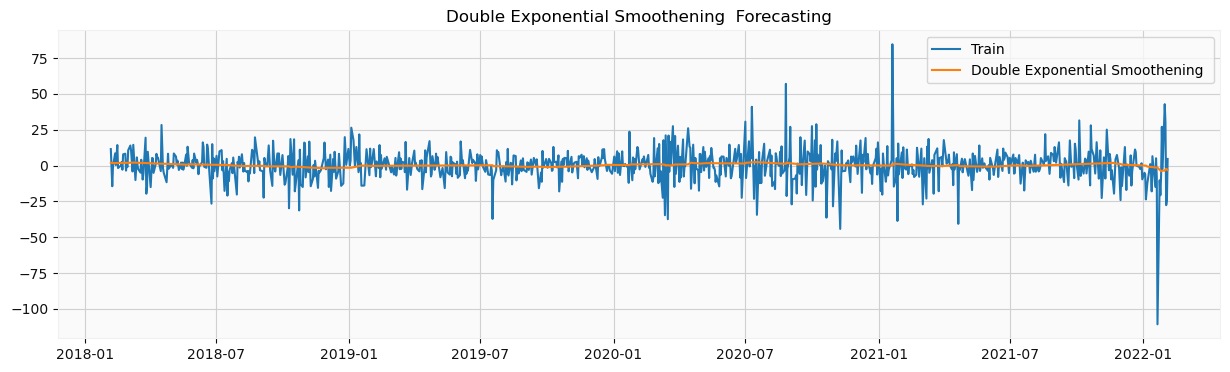

In [219]:

plotresults(df['diff'],double_exp.fittedvalues, "Double Exponential Smoothening ").show()
final= scoring(df['diff'],double_exp.fittedvalues,"Double Exponential Smoothening ")

In [220]:
models.append('Double Exponential Smoothening')
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Double Exponential Smoothening,11.12


In [221]:
# Define triple exponential smoothening
triple_exp= ExponentialSmoothing(df['diff'], trend='add', seasonal='add', seasonal_periods=10).fit()

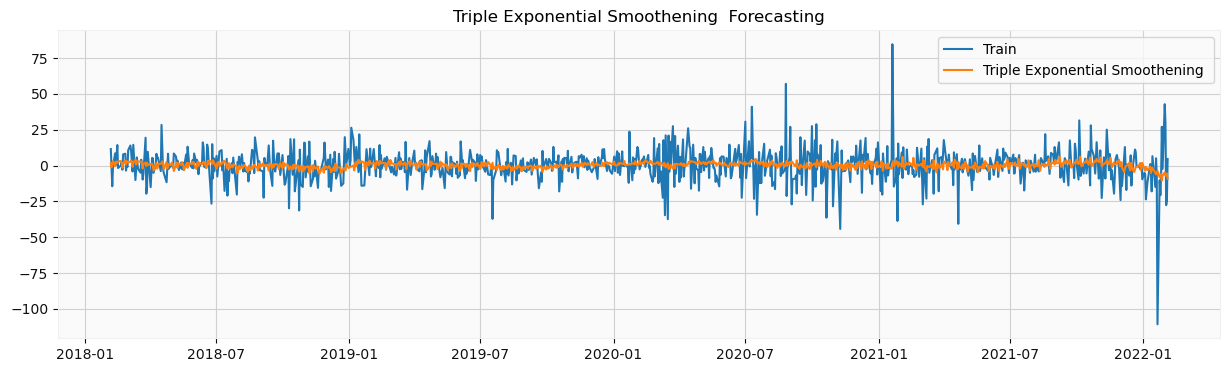

In [222]:

plotresults(df['diff'],triple_exp.fittedvalues, "Triple Exponential Smoothening ").show()
final= scoring(df['diff'],triple_exp.fittedvalues,"Triple Exponential Smoothening ")

In [223]:
models.append('Triple Exponential Smoothening')
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Triple Exponential Smoothening,11.22


<div class='alert alert-info alert-block' align='center'><h4>AR Models</h4></div> 

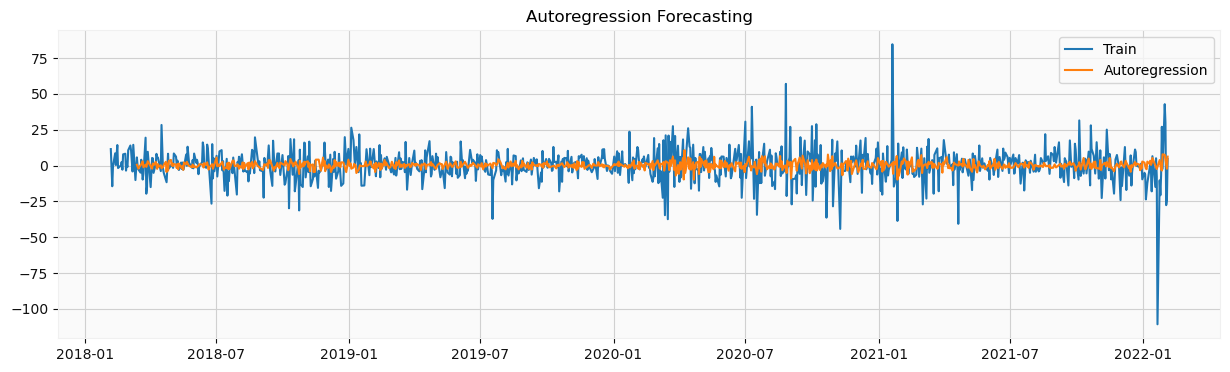

In [225]:
# fit model
arModel = AutoReg(df['diff'], lags=25)
res = arModel.fit()
# make prediction
plotresults(df['diff'],res.fittedvalues, "Autoregression").show()
final=scoring(df['diff'][0:-25],res.fittedvalues,"Autoregression")

In [226]:
# store and print results
models.append("Autoregression")

results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Autoregression,10.18


<div class='alert alert-info alert-block' align='center'><h4>ARMA Models</h4></div> 

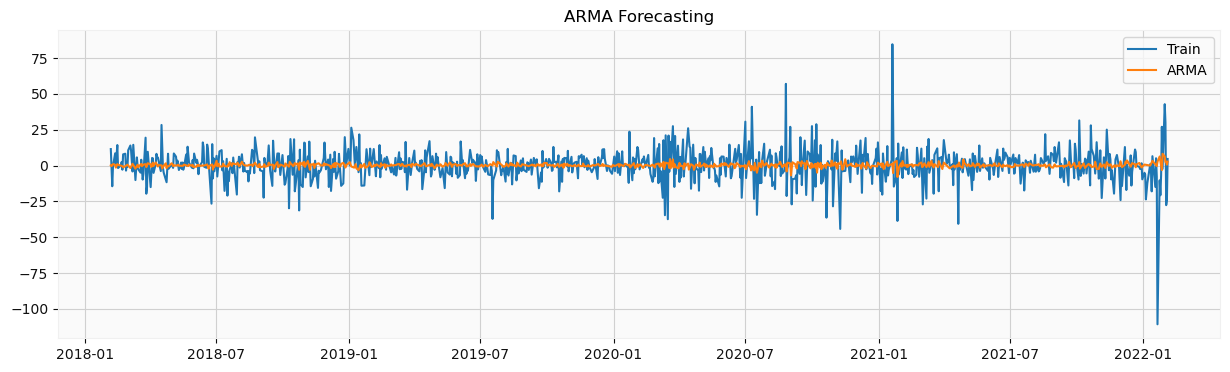

In [229]:
# fit model
model = ARIMA(df['diff'], order=(1, 0, 5))
armaModel = model.fit()

# make prediction, plot and get metrics
plotresults(df['diff'],armaModel.fittedvalues, "ARMA").show()
final=scoring(df['diff'],armaModel.fittedvalues, "ARMA")


In [230]:
# store and print results
models.append("ARMA")

results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,ARMA,10.97


<div class='alert alert-info alert-block' align='center'><h4>ACF and PACF Plot</h4></div> 

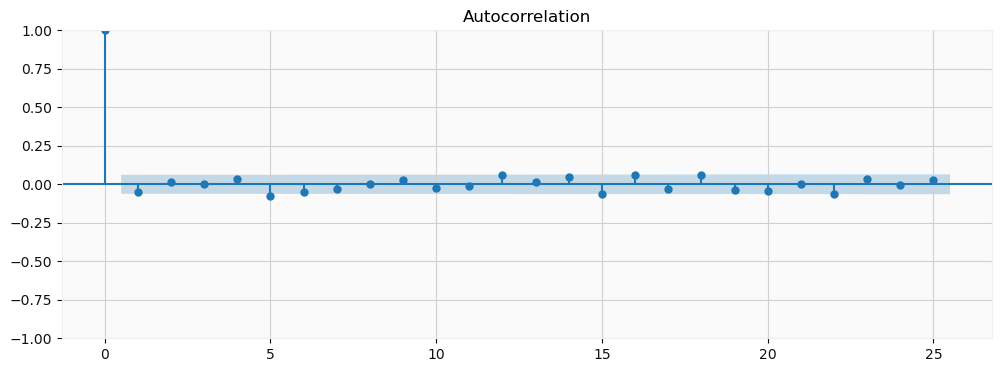

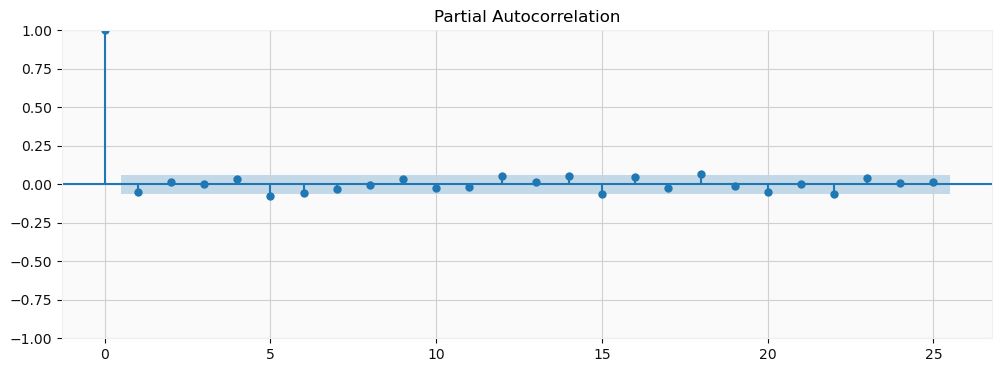

In [233]:
rcParams['figure.figsize'] = 12,4
plot_acf(df['diff'],lags=25);
plot_pacf(df['diff'],lags=25);

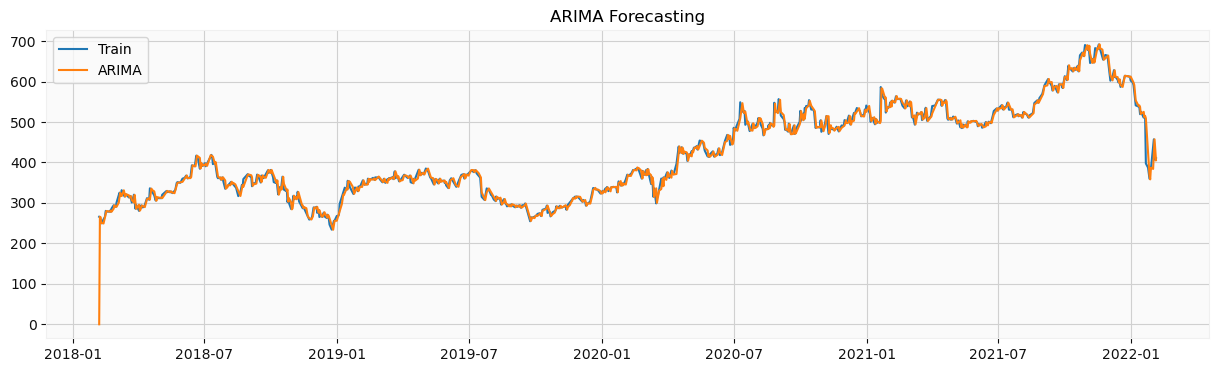

,Method,RMSE
0,ARIMA,13.84


In [234]:
# fit model
# order parameter is where we define p, d and q values.
model = ARIMA(df['Close'], order=(1, 1, 1))
arimaModel = model.fit()


# make prediction and plots
plotresults(df['Close'],arimaModel.fittedvalues, "ARIMA").show()
final=scoring(df['Close'],arimaModel.fittedvalues,  "ARIMA")
# store and print results


models.append("ARIMA")

results.append(final.RMSE.tolist()[0])
final

<div class='alert alert-info alert-block' align='center'><h4>SARIMA Models</h4></div> 

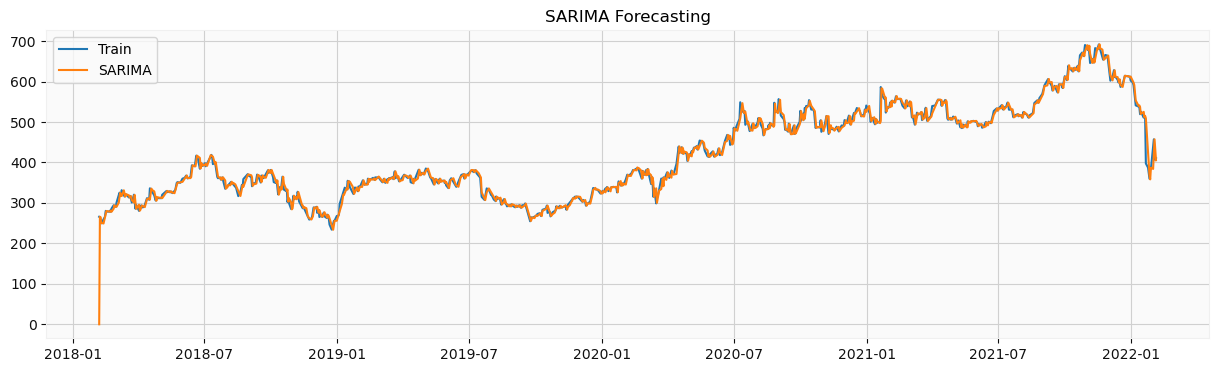

,Method,RMSE
0,SARIMA,13.84


In [236]:

# import SARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['Close'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
sariMa = model.fit(disp=False)
# make prediction
plotresults(df['Close'],sariMa.fittedvalues, "SARIMA").show()
final=scoring(df['Close'],sariMa.fittedvalues, "SARIMA")
# store and print results
models.append("SARIMA")
results.append(final.RMSE.tolist()[0])
final

In [237]:
model_result = pd.DataFrame(list(zip(models, results)),
               columns =['Model', 'RMSE of the model'])
model_result

,Model,RMSE of the model
0,Moving Average,11.05
1,Double Exponential Smoothening,9.81
2,Triple Exponential Smoothening,11.12
3,Autoregression,11.22
4,ARMA,10.18
5,ARIMA,10.97
6,SARIMA,13.84


In [238]:
model_result.sort_values('RMSE of the model',ascending=True)

,Model,RMSE of the model
1,Double Exponential Smoothening,9.81
4,ARMA,10.18
5,ARIMA,10.97
0,Moving Average,11.05
2,Triple Exponential Smoothening,11.12
3,Autoregression,11.22
6,SARIMA,13.84


Double Exponential Smoothening model giving the best result among all models